In [35]:
import numpy as np
import sys
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [36]:
cf = 1e-9
rho0 = 1000
P0 = 120e5
k = 1e-14
mu = 1e-3
phi = 0.2
L = 500.0

In [37]:
def rho (P):
    return rho0 * (1.0 + cf * (P - P0));

In [38]:
n = 100
tau = 3600
T = 864000
_P0 = 1.013e+7
Pinj = 1.52e+7
Pprod = 5.066e+6

In [39]:
p = np.zeros(n)
a = np.zeros(n)
b = np.zeros(n)
c = np.zeros(n)
d = np.zeros(n)
A = np.zeros(n)
B = np.zeros(n)
p[0] = Pinj
for i in range(1,n-1):
        p[i] = _P0
p[n - 1] = Pprod
t = 0.0
h = L / n

In [40]:
data = np.zeros((81,n))
X = np.linspace(0,500,100)
data[0][:] = p

In [41]:
while(t < T):
    ##Рассчитываем диагональные элементы матрицы
    a[0] = 1.0;
    b[0] = 0.0;
    d[0] = Pinj;
    for i in range(1,n-1):
        c[i] = k * (rho(p[i]) if p[i] >= p[i+1] else rho(p[i+1])) / (mu  * h * h)
        b[i] = k * (rho(p[i-1]) if p[i-1] >= p[i] else rho(p[i])) / (mu  * h * h)
        a[i] = - c[i] - b[i] - phi * cf * rho0 / tau
        d[i] = - phi * cf * rho0 / tau * p[i] 
    a[n - 1] = 1.0
    c[n - 1] = 0.0
    d[n - 1] = Pprod

    ##Прямой ход прогонки
    A[1] = - b[0] / a[0]
    B[1] = d[0] / a[0]
    for i in range(1,n-1):
        A[i + 1] = - b[i] / (c[i] * A[i] + a[i])
        B[i + 1] = (d[i] - c[i] * B[i]) / (c[i] * A[i] + a[i])
    ##Обратный ход прогонки
    p[n - 1] = (d[n - 1] - c[n - 1] * B[n - 1]) / (c[n - 1] * A[n - 1] + a[n - 1])
    for i in range(n-1,0,-1):
        p[i - 1] = A[i] * p[i] + B[i]
        ##запись результатов(каждые 3 часа)
    if(t%10800 == 0):
        data[int(t/10800)+1][:] = p
    t += tau;


In [42]:
print(data)

[[15200000.         10130000.         10130000.         ...
  10130000.         10130000.          5066000.        ]
 [15200000.         13625085.28654772 12542010.01649428 ...
   7718227.40814123  6635258.74989681  5066000.        ]
 [15200000.         14610137.56020005 14036791.66048927 ...
   6225252.47856071  5653525.18859395  5066000.        ]
 ...
 [15200000.         15096950.04228485 14993911.66608808 ...
   5270458.69906603  5168224.69026771  5066000.        ]
 [15200000.         15096970.32862957 14993952.14663754 ...
   5270409.75477736  5168200.17439766  5066000.        ]
 [15200000.         15096988.81721138 14993989.03938113 ...
   5270364.55924422  5168177.53643762  5066000.        ]]


<IPython.core.display.Javascript object>


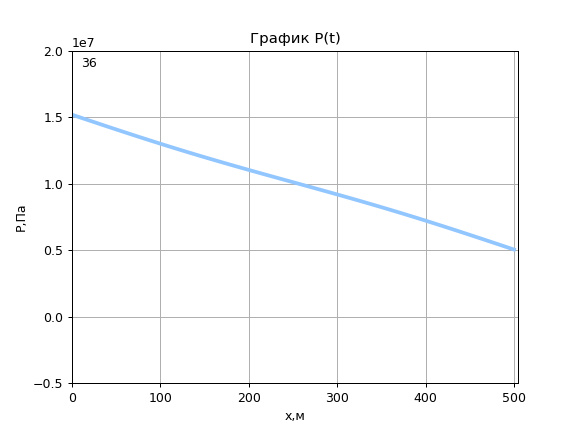

In [45]:
%matplotlib notebook
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0, 505), ylim=(-0.5e7, 2e7))
ax.set_ylabel("P,Па")
ax.set_xlabel("x,м")
plt.title('График P(t)') 
plt.grid()
line, = ax.plot([], [], lw=3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    time_text.set_text('')
    line.set_data([], [])
    return line,
def animate(i):
    x = X
    y = data[i]
    time_text.set_text(i)
    line.set_data(x, y)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=80, interval=300, blit=True)
##anim.save('gif/график P(t).gif', writer='imagemagick')